In [24]:
from IPython import display

Is pandas really faster? Well the answer is most of the time. A bunch of the more advanced python librabries like numpy and pandas use vectorisation the speed up their functions. In vectorisation, instead of running through the values one by one, we perform the same operation on a bunch of values saved as a vector. This is possible because of modern CPUs single instruction, multiple data (SIMD) processing. Traditionally processors could only hold one value and thus had to process one value at a time. Modern processors can hold multiple values and therefore run the same operation on a vector of values if you program it to do so. Let's now demonstrate this is a simple example comparing a columns of random data:

In [ ]:
#A simple comparison of 2 columns as an example 
df[fd.A != df.B]  #pandas using vectorisation
df.query('A != B') #query from numexpr library
df[[x != y for x, y in zip(df.A, df.B)]] #normal for loop (list comprehension)

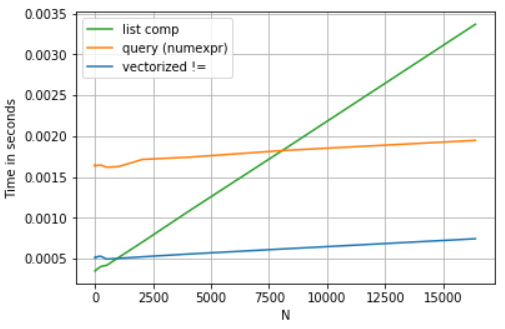

In [29]:
display.Image("https://raw.githubusercontent.com/kraikisto/CERN_LEP_Z_boson/main/comparison.png") 

Here instead of a traditional loop we use somthing called list comprehension. It's built into python and functions just like a normal for loop, but has some improvements. Interestingly if we compare to another vectorised method from numpy we see that it is even faster. It seems that specifically .values is signifantly better than its pandas counterpart.

In [ ]:
df[df.A.values != df.B.values] #.values returns a numpy array

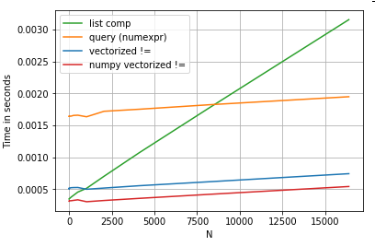

In [30]:
display.Image("https://raw.githubusercontent.com/kraikisto/CERN_LEP_Z_boson/main/comparison_numpy.png") 

Vectorisation isn't always better. If the data isn't numbers, but objects or strings it is much harder to vectorise. Also if the datatypes are mixed it slows down vectorisation significantly. Here is a demonstration of mixed datasets: 

In [ ]:
df.query('A != B') #query from numexpr library
df[df.PT1 != df.PT2]  #pandas using vectorisation
df[[x != y for x, y in zip(df.PT1, df.PT2)]] #normal for loop (list comprehension)

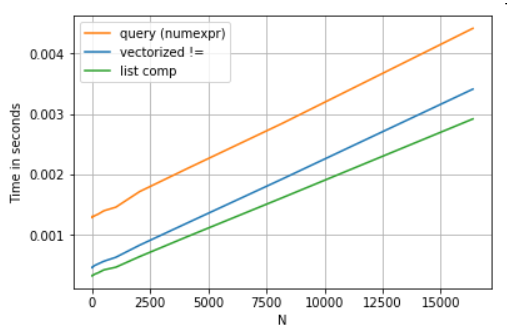

In [32]:
display.Image("https://raw.githubusercontent.com/kraikisto/CERN_LEP_Z_boson/main/mixed_comparison.png") 

Note: pandas code here is much easier to read than the for loop. 

Note: in pandas some functions don't use vectorisation. iterrows() and apply() both lose to a normal loop (using list comprehension, they beat it otherwise). apply() is not shown on the graphs because its so slow it would be hard to see the the differences of the other ones. 

Note: I took the plotting code straight form the internet so if this gets officially used citing would probably be appropriate. Also maybe could change a few things about it, like comparing to query seems a bit pointless.